### Rukmini Annadata (222010326006)

### Twitter Mining on 'Twitter US Airline Sentiment' dataset from Kaggle

In [1]:
pip install pandas matplotlib prettytable nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from nltk import FreqDist
from nltk.tokenize import word_tokenize

### Load the Twitter US Airline Sentiment dataset

In [3]:
twitter_data = pd.read_csv('C:/Users/rukmi/OneDrive/Desktop/Tweets.csv')

In [4]:
# Display the first few rows of the dataset
print(twitter_data.head())

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

### Task 2: Anatomy of a Tweet

In [5]:
def display_tweet_anatomy(tweet):
    print("Tweet Anatomy:")
    print(f"Tweet ID: {tweet['tweet_id']}")
    print(f"Sentiment: {tweet['airline_sentiment']}")
    print(f"User: {tweet['name']}")
    print(f"Tweet Text: {tweet['text']}")
    print(f"Retweet Count: {tweet['retweet_count']}")
    print(f"Coordinates: {tweet['tweet_coord']}")
    print(f"Created At: {tweet['tweet_created']}")
    print(f"Location: {tweet['tweet_location']}")
    print(f"Timezone: {tweet['user_timezone']}")

In [6]:
# Display anatomy for the first tweet
display_tweet_anatomy(twitter_data.iloc[0])

Tweet Anatomy:
Tweet ID: 5.7030613367776e+17
Sentiment: neutral
User: cairdin
Tweet Text: @VirginAmerica What @dhepburn said.
Retweet Count: 0
Coordinates: nan
Created At: 24-02-2015 11:35
Location: nan
Timezone: Eastern Time (US & Canada)


### Task 3: Extracting text, screen names, and hashtags from tweets

In [9]:
# Task 3: Extracting text, screen names, and hashtags from tweets
def extract_info_from_tweet(tweet):
    text = tweet['text']
    screen_names = ', '.join([user_mention[1:] for user_mention in text.split() if user_mention.startswith('@')])
    hashtags = ', '.join([hashtag[1:] for hashtag in text.split() if hashtag.startswith('#')])
    return text, screen_names, hashtags

# Extract information for the first tweet
text, screen_names, hashtags = extract_info_from_tweet(twitter_data.iloc[0])
print("\nExtracted Information:")
print(f"Text: {text}")
print(f"User Mentions: {screen_names}")
print(f"Hashtags: {hashtags}")



Extracted Information:
Text: @VirginAmerica What @dhepburn said.
User Mentions: VirginAmerica, dhepburn
Hashtags: 


### Task 4: Creating a basic frequency distribution from the words in tweets

In [10]:
def create_word_frequency_distribution(text_column):
    words = ' '.join(text_column.dropna()).lower().split()
    word_freq = FreqDist(words)
    return word_freq

In [11]:
# Apply lowercase to the 'text' column, drop NaN values
word_freq = create_word_frequency_distribution(twitter_data['text'].str.lower())

### Task 5: Using prettytable to display tuples in a nice tabular format

In [13]:
from prettytable import PrettyTable

def display_word_frequency_table(word_freq):
    table = PrettyTable(["Word", "Frequency"])
    for word, freq in word_freq.most_common(10):
        table.add_row([word, freq])
    print("Word Frequency Table:")
    print(table)

# Assuming you have already created a word_freq object
# and now you want to display the word frequency table
display_word_frequency_table(word_freq)


Word Frequency Table:
+---------+-----------+
|   Word  | Frequency |
+---------+-----------+
|    to   |    8590   |
|   the   |    6034   |
|    i    |    5351   |
|    a    |    4461   |
|   for   |    3964   |
| @united |    3760   |
|   and   |    3693   |
|    on   |    3652   |
|   you   |    3607   |
|    my   |    3272   |
+---------+-----------+


In [14]:
# Display the word frequency table
display_word_frequency_table(word_freq)

Word Frequency Table:
+---------+-----------+
|   Word  | Frequency |
+---------+-----------+
|    to   |    8590   |
|   the   |    6034   |
|    i    |    5351   |
|    a    |    4461   |
|   for   |    3964   |
| @united |    3760   |
|   and   |    3693   |
|    on   |    3652   |
|   you   |    3607   |
|    my   |    3272   |
+---------+-----------+


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rukmi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Task 6: Calculating lexical diversity for tweets

In [19]:
import pandas as pd
from nltk import word_tokenize

# Calculate lexical diversity for tweets
twitter_data['lexical_diversity'] = twitter_data['text'].apply(lambda x: len(set(word_tokenize(str(x).lower()))) / len(word_tokenize(str(x).lower())))

# Display lexical diversity column
print("\nLexical Diversity for Tweets:")
print(twitter_data[['text', 'lexical_diversity']].head())



Lexical Diversity for Tweets:
                                                text  lexical_diversity
0                @VirginAmerica What @dhepburn said.           0.857143
1  @VirginAmerica plus you've added commercials t...           1.000000
2  @VirginAmerica I didn't today... Must mean I n...           0.937500
3  @VirginAmerica it's really aggressive to blast...           1.000000
4  @VirginAmerica and it's a really big bad thing...           0.916667


### Task 7: Finding the most popular retweets

In [21]:
most_popular_retweets = twitter_data.sort_values(by='retweet_count', ascending=False).head(10)
print("\nMost Popular Retweets:")
print(most_popular_retweets[['text', 'retweet_count']])


Most Popular Retweets:
                                                    text  retweet_count
11596  @USAirways 5 hr flight delay and a delay when ...             44
11582  @USAirways of course never again tho . Thanks ...             32
7132   STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY....             31
9999   @USAirways with this livery back in the day. h...             28
5607   @SouthwestAir beautiful day in Seattle! http:/...             22
7115   can you not? RT @JetBlue Our fleet's on fleek....             22
7027   Just in case you needed confirmation that "on ...             18
7111   X____x RT @JetBlue: Our fleet's on fleek. http...             15
7453   @JetBlue what a great experience on flight fro...             11
9453   @USAirways Wow unbelievable how you treat your...              9


### Task 8: Looking up users who have retweeted a status

In [24]:
# Filter tweets that have been retweeted at least once
retweeted_tweets = twitter_data[twitter_data['retweet_count'] > 0]

# Group by retweeted user and count the number of retweets
retweeting_users = retweeted_tweets.groupby('name')['retweet_count'].sum().reset_index()

# Rename columns for clarity
retweeting_users.columns = ['retweeted_user', 'total_retweets']

# Display users who have retweeted and their total retweets
print("\nUsers Who Have Retweeted:")
print(retweeting_users)


Users Who Have Retweeted:
      retweeted_user  total_retweets
0        1234567890_               1
1            1LovePT               1
2     2533107724Paul               2
3          4wordSOUL               2
4      ADolledUpBlog               2
..               ...             ...
603    yorkshire2002               2
604   your_ride_dear               1
605  youroptimallife               1
606     zackintheusa               1
607        zacktzane               1

[608 rows x 2 columns]


### Task 9: Plotting frequencies of words

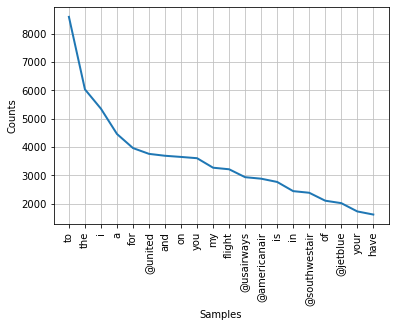

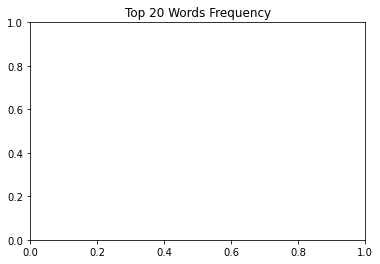

In [28]:
word_freq.plot(20, cumulative=False)
plt.title('Top 20 Words Frequency')
plt.show()


### Task 10: Generating histograms of words, screen names, and hashtags (Assuming 'entities' column is parsed)

In [33]:
import json

def parse_json(text):
    try:
        return json.loads(text)
    except json.JSONDecodeError:
        return {}

# Apply the parsing function to the 'text' column
twitter_data['text_parsed'] = twitter_data['text'].apply(parse_json)

# Extract screen names and hashtags from the parsed 'text' column
screen_name_freq = create_word_frequency_distribution(twitter_data['text_parsed'].apply(lambda x: ', '.join([user_mention['screen_name'] for user_mention in x.get('user_mentions', [])])))
hashtag_freq = create_word_frequency_distribution(twitter_data['text_parsed'].apply(lambda x: ', '.join([hashtag['text'] for hashtag in x.get('hashtags', [])])))


#### Generating a histogram of 'airline_sentiment_confidence''negativereason_confidence''retweet_count''lexical_diversity'

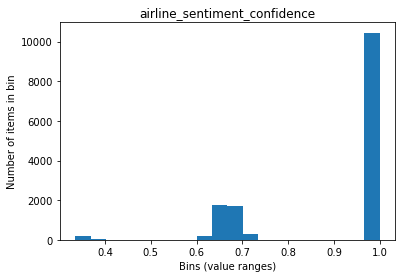

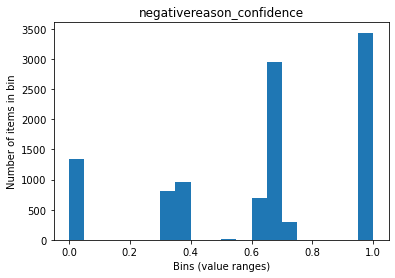

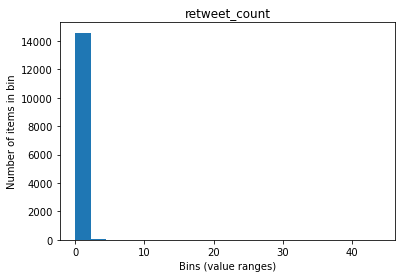

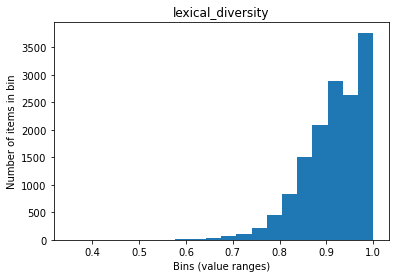

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Columns to include in histograms
numerical_columns = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count', 'lexical_diversity']

# Loop through numerical columns and generate histograms
for column in numerical_columns:
    plt.hist(twitter_data[column].dropna(), bins=20)  # Drop NaN values for plotting
    plt.title(column)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (value ranges)")
    plt.show()


### Task 11 -Generating a histogram of retweet counts

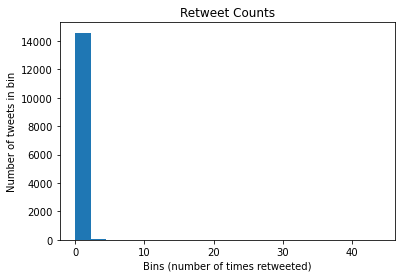

In [46]:
import matplotlib.pyplot as plt

# Extract retweet counts from the 'retweet_count' column
retweet_counts = twitter_data['retweet_count'].dropna()

# Generate a histogram of retweet counts
plt.hist(retweet_counts, bins=20)  # You can adjust the number of bins as needed
plt.title('Retweet Counts')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')
plt.show()


## Task - 12 Sentimental Analysis

In [49]:
sentiment_distribution = twitter_data['airline_sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


### Plot sentiment distribution

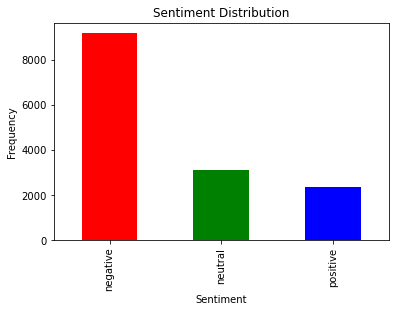

In [50]:
sentiment_distribution.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [51]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rukmi\AppData\Roaming\nltk_data...


True

Most Positive Tweet: "@VirginAmerica plus you've added commercials to the experience... tacky."
Most Negative Tweet: "@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse"


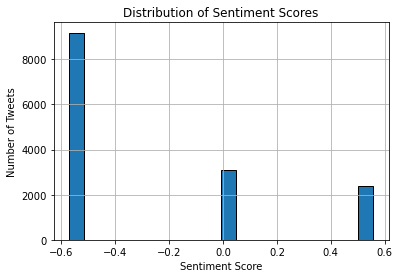

In [54]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 'airline_sentiment' column contains the sentiment labels in your DataFrame
sentiment_labels = twitter_data['airline_sentiment']

# Create a SentimentIntensityAnalyzer instance
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet
sentiment_scores = sentiment_labels.apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Add sentiment scores to the DataFrame
twitter_data['sentiment_score'] = sentiment_scores

# Find the most positive and most negative tweets
most_positive_tweet = twitter_data.iloc[np.argmax(sentiment_scores)]['text']
most_negative_tweet = twitter_data.iloc[np.argmin(sentiment_scores)]['text']

# Display the most positive and most negative tweets
print(f'Most Positive Tweet: "{most_positive_tweet}"')
print(f'Most Negative Tweet: "{most_negative_tweet}"')

# Histogram of sentiment scores
twitter_data['sentiment_score'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()